In [19]:
#Import various libraries, which will be used later

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from ipywidgets import interact, fixed
import ipywidgets as widgets

In [2]:
L = 10**(-10) #width of the infinite well
A = np.sqrt(2 / L) # normalisation constant
w = 0.2 * L #width of the square perturbation

m = 9.11 * 10**(-31) #Particle mass in Kg (in this case mass of an electron)
e = 1.6 * 10**(-19) #an electron volt
hbar = (6.626 * 10**(-34)) / (2 * np.pi) #Planck's constant divided by 2Pi

N = 100 #number of x-positions over which we will sample
x1 = 0.4 * L #starting point of the perturbation
x2 = 0.6 * L #end point of the perturbation

In [3]:
def energy(n):
    """
    Function to calculate the energy of the particle in an infinite 
    potential well in a particular quantum state
    
    Returns:
        energy : float
                 the energy of the particle
                 
    Parameter:
        n : integer
            the state of the wavefunction
    """
    
    energy = (n**2 * (np.pi)**2 * (hbar**2)) / (2 * m * L**2)
    return energy

In [4]:
def unperturbed(n, x):
    """
    Function to calculate the value of the wavefunction at a given point in the infinite potential well
    
    Returns:
        psi : float
              the value of the wavefunction
        
    Parameters:
        n : integer
            the order of the wavefunction
            
        x : float
            the position of the particle in the infinite potential well
    """
    
    psi = A * np.sin((n * np.pi * x) / L) #the solution to the unperturbed wavefunction in an infinite potential well
    return psi

In [13]:
def integral(k, n, V, x1, x2):
    """
    Function to calculate individual integrals, which will later be summed when finding the first-order
    correction to the wavefunction.
    
    Returns:
        perturb_1 : float
        
    Parameters:
        k : integer
            dummy variable. represents the principle quantum number and is what we will sum over in a later function
        
        n : integer
            principle quantum number
            
        V : float
            magnitude of the square perturbation
            
        w : float
            width of the central square pertubation
    """
    
    if x2 > L or x1 < 0:
        print ("Perturbation width exceeds that of the infinite well. Reduce perturbation width.")
        
    elif x2 < x1:
        print("x1 must be less than x2. Reduce x1 or increase x2.")
        
    else:
        def integrand(x):
            """
            Function to establish the integrand to be used when calculating the perturbation. Must do this 
            as cannot square the 'solution' function which is previously defined
            """
            
            return (A * np.sin((n * np.pi * x) / L)) * (np.conj(A * np.sin((k * np.pi * x) / L))) * V
        
        perturb_1 = quad(integrand, x1, x2)
        return perturb_1[0]

In [14]:
def sum_1(n, kmax, V, x1, x2):
    """
    Function to store integral values which will later be used to find the value of the corrected wavefunction.
    
    Returns:
        sum_1 : list
                list containing coefficients which will be used to find the corrected wavefunction.
        
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        V : float
            magnitude of the square perturbation
        
        w : float
            width of the central square pertubation
    """
    sum_1 = []
    
    for i in range(1, kmax + 1):
        if i == n:
            sum_1 = np.append(sum_1, 0)
        else:
            value = integral(i, n, V, x1, x2) / (energy(n) - energy(i))
            sum_1 = np.append(sum_1, value)
    
    return sum_1

In [15]:
def psi_correc(n, kmax, V, x1, x2):
    """
    A function to store the values of the (first-order) corrected wavefunction depending on the 
    specified perturbation.
    
    Returns:
        new_psi : listarray
                  contains the magnitude of the (first-order) corrected wavefunction for various x-positions
                  
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        x1 : float
             starting point of the perturbation
            
        x2 : float
             finishing point of the perturbation
    """
    
    new_psi = [] #empty listarray to store (first-order) corrected wavefunctions
    
    for x in np.arange(0, L, L / N):
        value = 0
        
        for i in range(1, kmax + 1):
            value += (sum_1(n, kmax, V, x1, x2)[i - 1] * unperturbed(i, x))
        
        new_psi = np.append(new_psi, value + unperturbed(n, x))
    
    return new_psi

In [24]:
@interact(n = (1, 3, 1), kmax = fixed(10), V = (0.0, 1e4, 1e3), x1 = (0.0, L * 1e10, 0.1), x2 = (0.0, L * 1e10, 0.1))
def plot_psi(n, kmax, V, x1, x2):
    """
    A function to plot the (first-order) corrected wavefunction for an infinite well containing
    a perturbation.
    
    Returns:
        a plot of the wavefunction magnitude against position
      
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        x1 : float
             starting point of the perturbation
            
        x2 : float
             finishing point of the perturbation
    """
    
    x_pos = np.linspace(0, L, N)
    
    #set the size of the figures
    fig = plt.figure(figsize = (8, 9))
    
    ax = fig.add_subplot(111)
     
    #general plot formatting
    ax.plot(x_pos, psi_correc(n, kmax, V * e, x1 * L, x2 * L))
    #ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
    
    plt.xlabel('x-position')
    plt.ylabel('Corrected wavefunction')
    plt.title('n = %i, V = %.1e eV, Start = %.2e Angstroms, End = %.2e Angstroms' %(n, V, x1, x2))
    return plt.show()

interactive(children=(IntSlider(value=2, description='n', max=3, min=1), FloatSlider(value=5000.0, description…

In [17]:
def psi_vs_V(n, kmax, Vmax, Vinc, x1, x2):
    """
    Function to find the wavefunction for many perturbations, each with a different magnitude. The function
    finds the value of the wavefunction at each individual position using the equation for the first-order
    corrected wavefunction. This value is then appended to an list containing the wavefunction magnitudes
    for a specific perturbation magnitude so that we have the entire wavefunction for that case. This list
    is then appended to another list containing the wavefunctions for many different perturbation magnitudes
    so that we produce a nested list.
    
    Returns:
        psi : nested list
              inner list contains the values of the wavefunction over an x-range. outer listarray contains
              the wavefunction for various perturbation magnitudes.
    
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        Vmax : float
               the maximum perturbation magnitude. we sample perturbation magnitudes up to this value
               
        Vinc : integer
               the number of pertubation magnitude increments which we will make
        
        x1 : float
             starting point of the perturbation
            
        x2 : float
             finishing point of the perturbation
    """
    
    #create an empty list to store all wavefunction magnitudes over various x-positions and perturbation magnitudes
    psi = [] 
    
    for v in np.arange(0, Vmax, Vmax / Vinc):
        new_psi = [] #empty list to store (first-order) corrected wavefunctions for a specific perturbation
    
        for x in np.arange(0, L, L / N):
            value = 0 #set this to zero for each new position
        
            for i in range(1, kmax + 1):
                #sum over all quantum states as specified in the first order wavefunction correction equation
                value += (sum_1(n, kmax, v, x1, x2)[i - 1] * unperturbed(i, x)) 
        
            new_psi.append(value + unperturbed(n, x)) #append wavefunction value for the specific x-position
            
        psi.append(new_psi) #append list containing wavefunction for specific perturbation to the nested listarray
        
    return psi

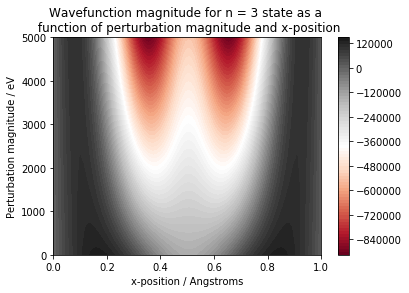

In [18]:
def psi_V_plot(n, kmax, Vmax, Vinc, x1, x2):
    """
    Function to visualise the wavefunction as a function of position for various perturbation magnitudes.
    
    Returns:
        2d colour plot of the wavefunction as a function of x-position and 
        perturbation magnitude
        
    Parameters:
        n : integer
            principle quantum number
            
        kmax : integer
               value of the dummy variable up to which we will sample
        
        Vmax : float
               the maximum perturbation magnitude. we sample perturbation magnitudes up to this value
               
        Vinc : integer
               the number of pertubation magnitude increments which we will make
        
        x1 : float
             starting point of the perturbation
            
        x2 : float
             finishing point of the perturbation    
    """
    
    x = np.linspace(0, L / 10**(-10), N) #list containing the x-positions over which we have sampled
    V = np.linspace(0, Vmax / e, Vinc) #list containing the perturbation magnitudes over which we have sampled
    psi = psi_vs_V(n, kmax, Vmax, Vinc, x1, x2) #nested listarray containing the wavefunction magnitudes
    
    plt.contourf(x, V, psi, 100, cmap = 'RdGy') #contourf creates a 2d colour plot
    plt.colorbar() #a key showing how colour relates to wavefunction magnitude
    
    #various plot formatting
    plt.xlabel('x-position / Angstroms')
    plt.ylabel('Perturbation magnitude / eV')
    plt.title('Wavefunction magnitude for n = %i state as a \n function of perturbation magnitude and x-position' %n)
    
    plt.show()

psi_V_plot(3, 10, 5000*e, 10, x1, x2)